In [3]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
%matplotlib notebook

In [4]:
# parser_data_directory should be set to the data-directory which the blocksci_parser output
chain = blocksci.Blockchain("/home/ubuntu/bitcoin")

# Messing around

In [6]:
%time txes = chain.map_blocks(lambda txes:txes.outputs,'1-1-2017','30-12-2017')

CPU times: user 1.31 s, sys: 652 ms, total: 1.96 s
Wall time: 2.98 s


In [4]:
print(max(txes[0].value))

27500000000


In [5]:
print(len(txes))

55617


In [39]:
ind = np.argmax(txes[0].value)

In [40]:
print(txes[0].value[ind])

27500000000


In [41]:
print(txes[0].address[ind])

PubkeyHashAddress(1AzD6boAj6p4zBLZUrBXfZWw3wmjWd9FxN)


In [4]:
import blocksci.cluster_python
# cluster_data_directory should be set to the directory containing the
# output of the `clusterer` program
cm = blocksci.cluster_python.ClusterManager("/home/ubuntu/bitcoin/clusters", chain)

In [43]:
# Find the balance held by the cluster containing the given address at block height 494653 
address = chain.address_from_string("1AzD6boAj6p4zBLZUrBXfZWw3wmjWd9FxN")
cluster = cm.cluster_with_address(address)


In [44]:
print(cluster.in_txes_count())

66


In [45]:
address = txes[0].address[ind]

In [46]:
address.in_txes_count() 

38

In [47]:
address.equiv()

EquivAddress(PubkeyHashAddress(1AzD6boAj6p4zBLZUrBXfZWw3wmjWd9FxN))

# Fees from 2017

In [10]:
year = '1-12-2017','30-12-2017';
%time r = chain.range('1-12-2017','30-12-2017')

CPU times: user 56 ms, sys: 16 ms, total: 72 ms
Wall time: 68.2 ms


In [7]:
average_fees = []
height = []
for block in r:
    average_fees.append(block.txes.fee_per_byte())
    height.append(block.height)


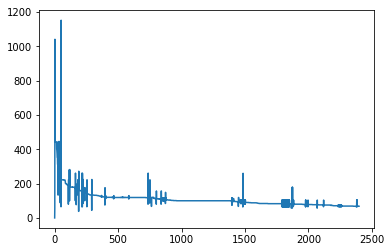

In [5]:
plt.plot(average_fees[0]) #interesting, pattern is the same for all blocks
#makes sense, since higher fees would be added to block first?

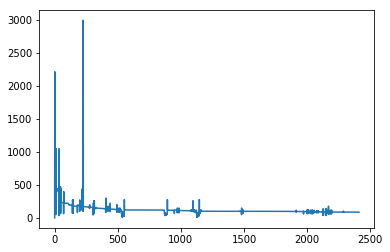

In [29]:
plt.plot(average_fees[801])

In [16]:
from statistics import mean
avg_blk_fee = map(mean, zip(*average_fees))


In [19]:
avg_blk_fee = []
for fee in average_fees:
    avg_blk_fee.append(sum(fee)/len(fee))
    

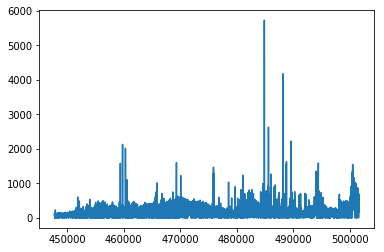

In [24]:
plt.plot(height,avg_blk_fee)

# coinbase

In [11]:
outputs = []
for block in r:
    outputs.append(block.coinbase_tx.output_value)


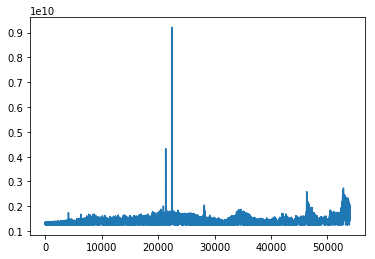

In [12]:
plt.plot(outputs)

In [13]:
print("Max btc revenue: {:.2f}".format(max(b.coinbase_tx.output_value for b in r) * 10e-8))



Max btc revenue: 921.57


In [14]:
outputs_tx = []
for block in r:
    outputs_tx.append(block.coinbase_tx)

In [15]:
from operator import attrgetter
max_cb_tx = max(outputs_tx, key=attrgetter('output_value'))

In [16]:
print(max_cb_tx.outputs.address)

[ScriptHashAddress(3NA8hsjfdgVkmmVS9moHmkZsVCoLxUkvvv), NulldataAddressData()]


In [17]:
address = chain.address_from_string("3NA8hsjfdgVkmmVS9moHmkZsVCoLxUkvvv")


In [18]:
address.balance()

853386

In [19]:
address = chain.address_from_string("3NA8hsjfdgVkmmVS9moHmkZsVCoLxUkvvv")
cluster = cm.cluster_with_address(address)

In [20]:
print("y")

y


In [22]:
print(cluster)

## Top addresses

## Bitfinex

In [32]:
address = chain.address_from_string("3D2oetdNuZUqQHPJmcMDDHYoqkyNVsFk9r")
address.balance()

18603233403702

In [33]:
bitfinex_cluster = cm.cluster_with_address(address)

In [34]:
bitfinex_cluster.balance()

18603235310462

In [35]:
bitfinex_cluster.addresses

[PubkeyHashAddress(1FTgECWAnepRwHcouefWpANHgywQ35DNcp),
 PubkeyHashAddress(14fKDsrybDqAsScDTdPewAfmrm9fE9AG7G),
 PubkeyHashAddress(1DvHWkoRUPV8UZNF5my7rMwgvpiGdbjUMQ),
 PubkeyHashAddress(1Da1P3LUJAEkCEbQ8UqrkfJRhZKyKESZcM),
 PubkeyHashAddress(1K5cfGc879DkQDqW3ZeJnksp79LEnRtL3E),
 PubkeyHashAddress(1PvtFep2oS8ZvihreYWh1AS8tUvAvFRwCm),
 PubkeyHashAddress(1JPHfx1AdX2HUr7z81Rq8JnqjVV9xsC6NH),
 ScriptHashAddress(3D2oetdNuZUqQHPJmcMDDHYoqkyNVsFk9r),
 MultisigAddress(3 of 6)]

In [36]:
bitfinex_cluster.out_txes_count()

4650

In [37]:
bitfinex_txes = bitfinex_cluster.out_txes()

In [44]:
outs = []
block = []
for tx in bitfinex_txes:
    outs.append(tx.output_value)
    block.append(tx.block.timestamp)
    
dates = pd.DataFrame(block)
dates = chain.heights_to_dates(dates)

In [38]:
%time 
txs = [(tx.block.height, tx.output_count,tx.output_value,tx.input_value) for tx in bitfinex_txes]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.39 µs


In [39]:
bitfinex_df = pd.DataFrame(txs, columns=["Height", "outputs_count", "outputs_value", 'inputs_value'])
bitfinex_df=bitfinex_df.set_index('Height')
bitfinex_df = chain.heights_to_dates(bitfinex_df)
bitfinex_df.tail()

,outputs_count,outputs_value,inputs_value
Height,,,
2018-03-20 01:40:55,2,72582711414,72582720854
2018-03-20 04:00:00,2,78649023728,78649039609
2018-03-20 04:39:50,2,66716035222,66716046162
2018-03-20 09:01:36,2,102193771074,102193791016
2018-03-20 09:43:41,2,48829579560,48829584500


<IPython.core.display.Javascript object>


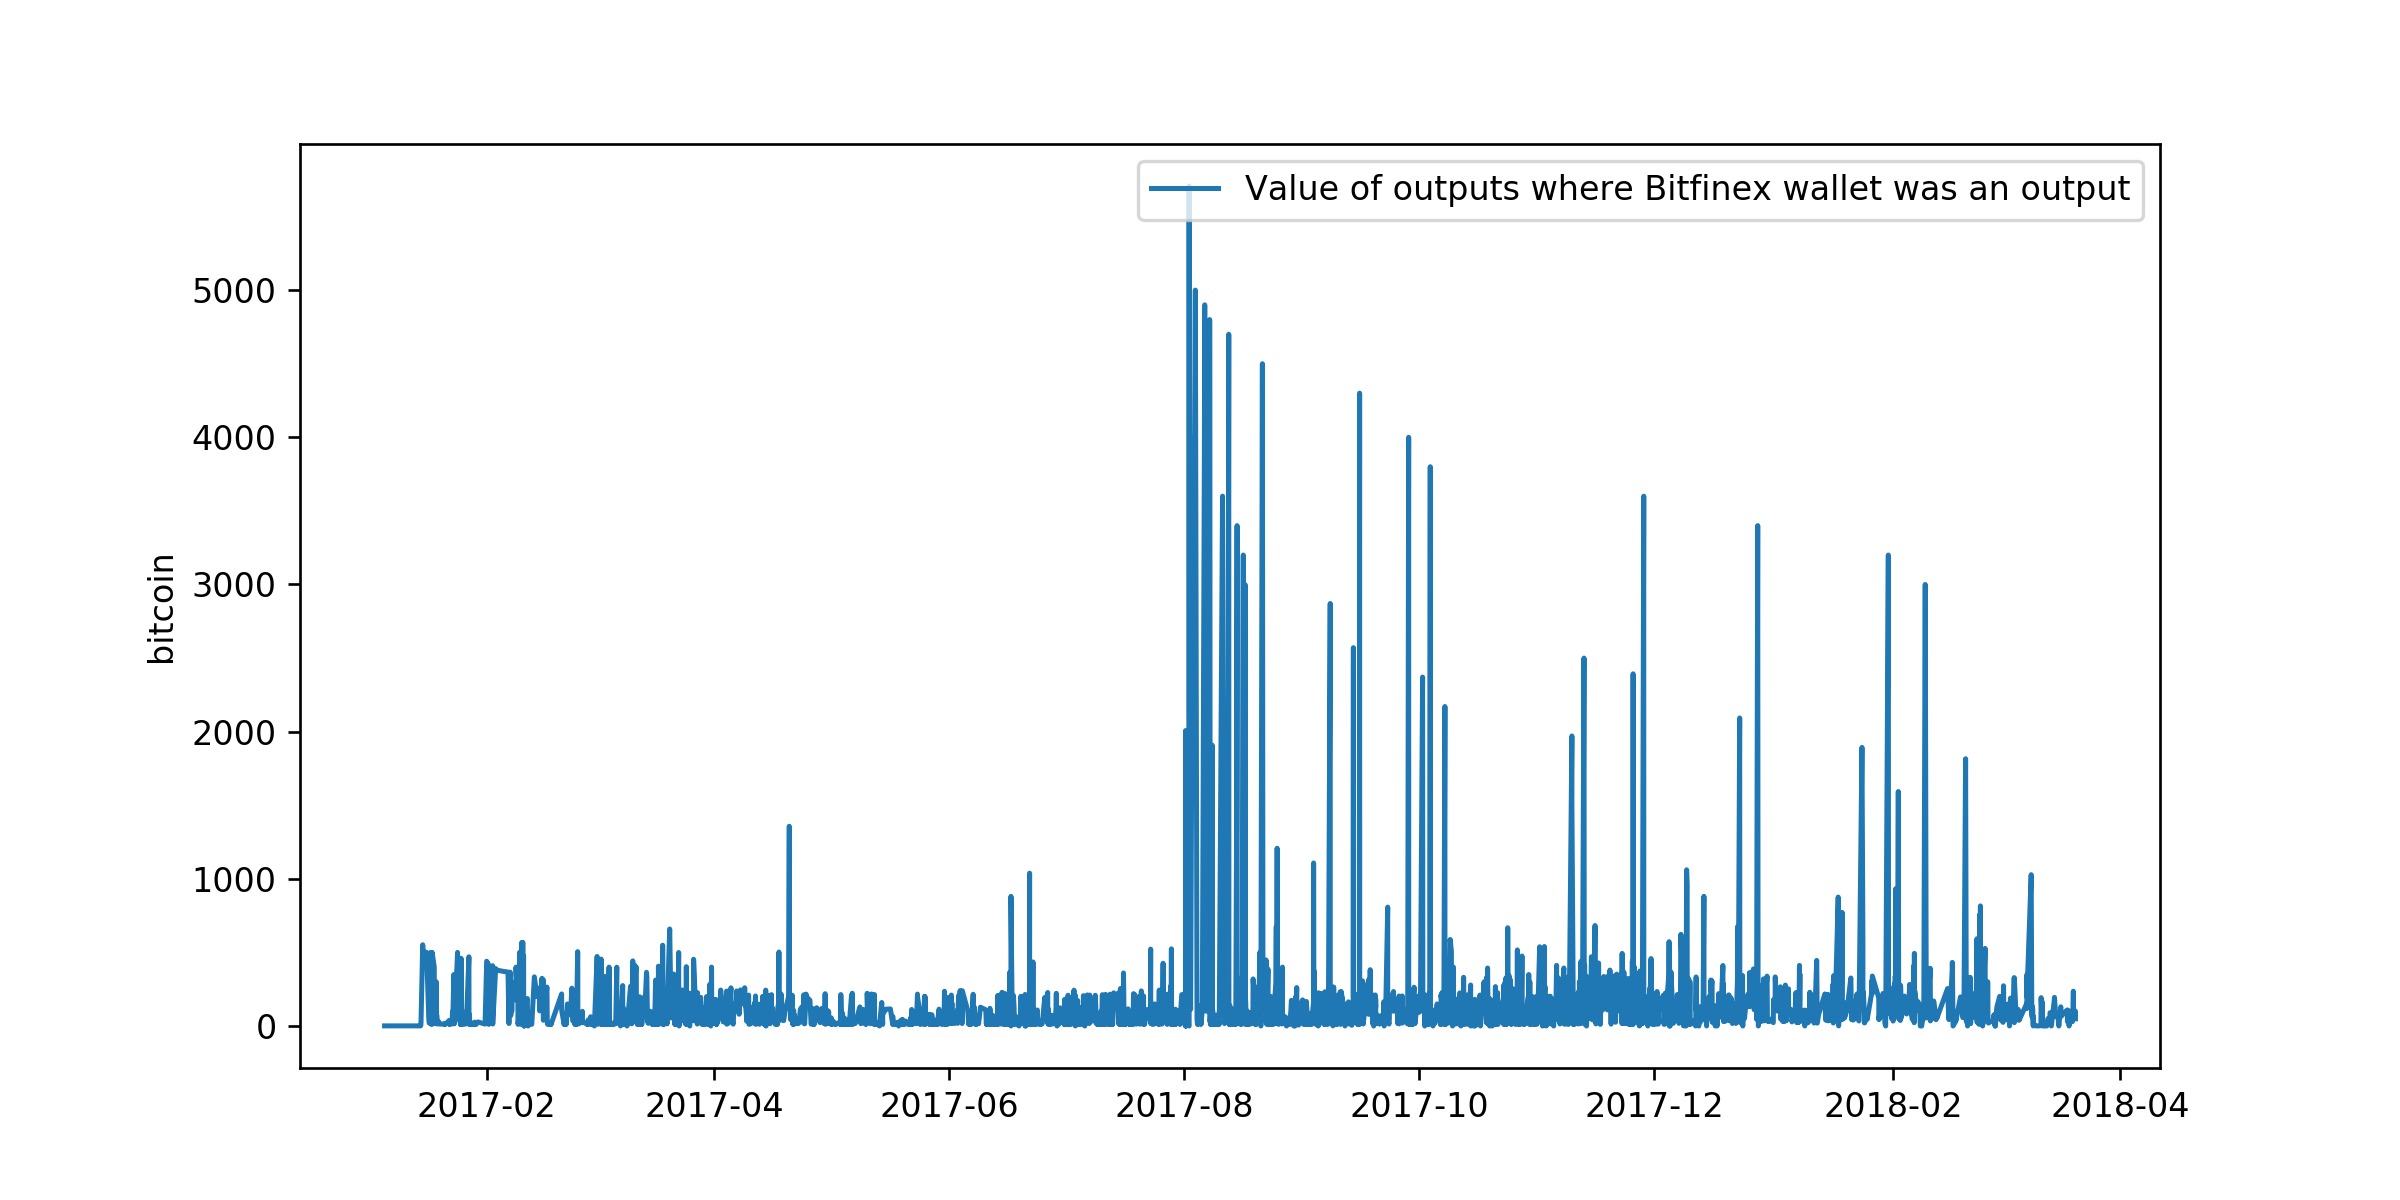

Text(0,0.5,'bitcoin')

In [57]:
plt.title('Bitfinex Outputs')
plt.ylabel('Undamped')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(bitfinex_df['inputs_value']/10e8)
ax.legend(["Value of outputs where Bitfinex wallet was an output"])
ax.set_ylabel('bitcoin')

## Binance
16ftSEQ4ctQFDtVZiUBusQUjRrGhM3JYwe

In [6]:
binance_address = chain.address_from_string("16ftSEQ4ctQFDtVZiUBusQUjRrGhM3JYwe")
binance_address.balance()

9994709397202

In [8]:
binance_cluster = cm.cluster_with_address(binance_address)
binance_txes = binance_cluster.out_txes()
binance_cluster.balance()

9994709397202

<IPython.core.display.Javascript object>


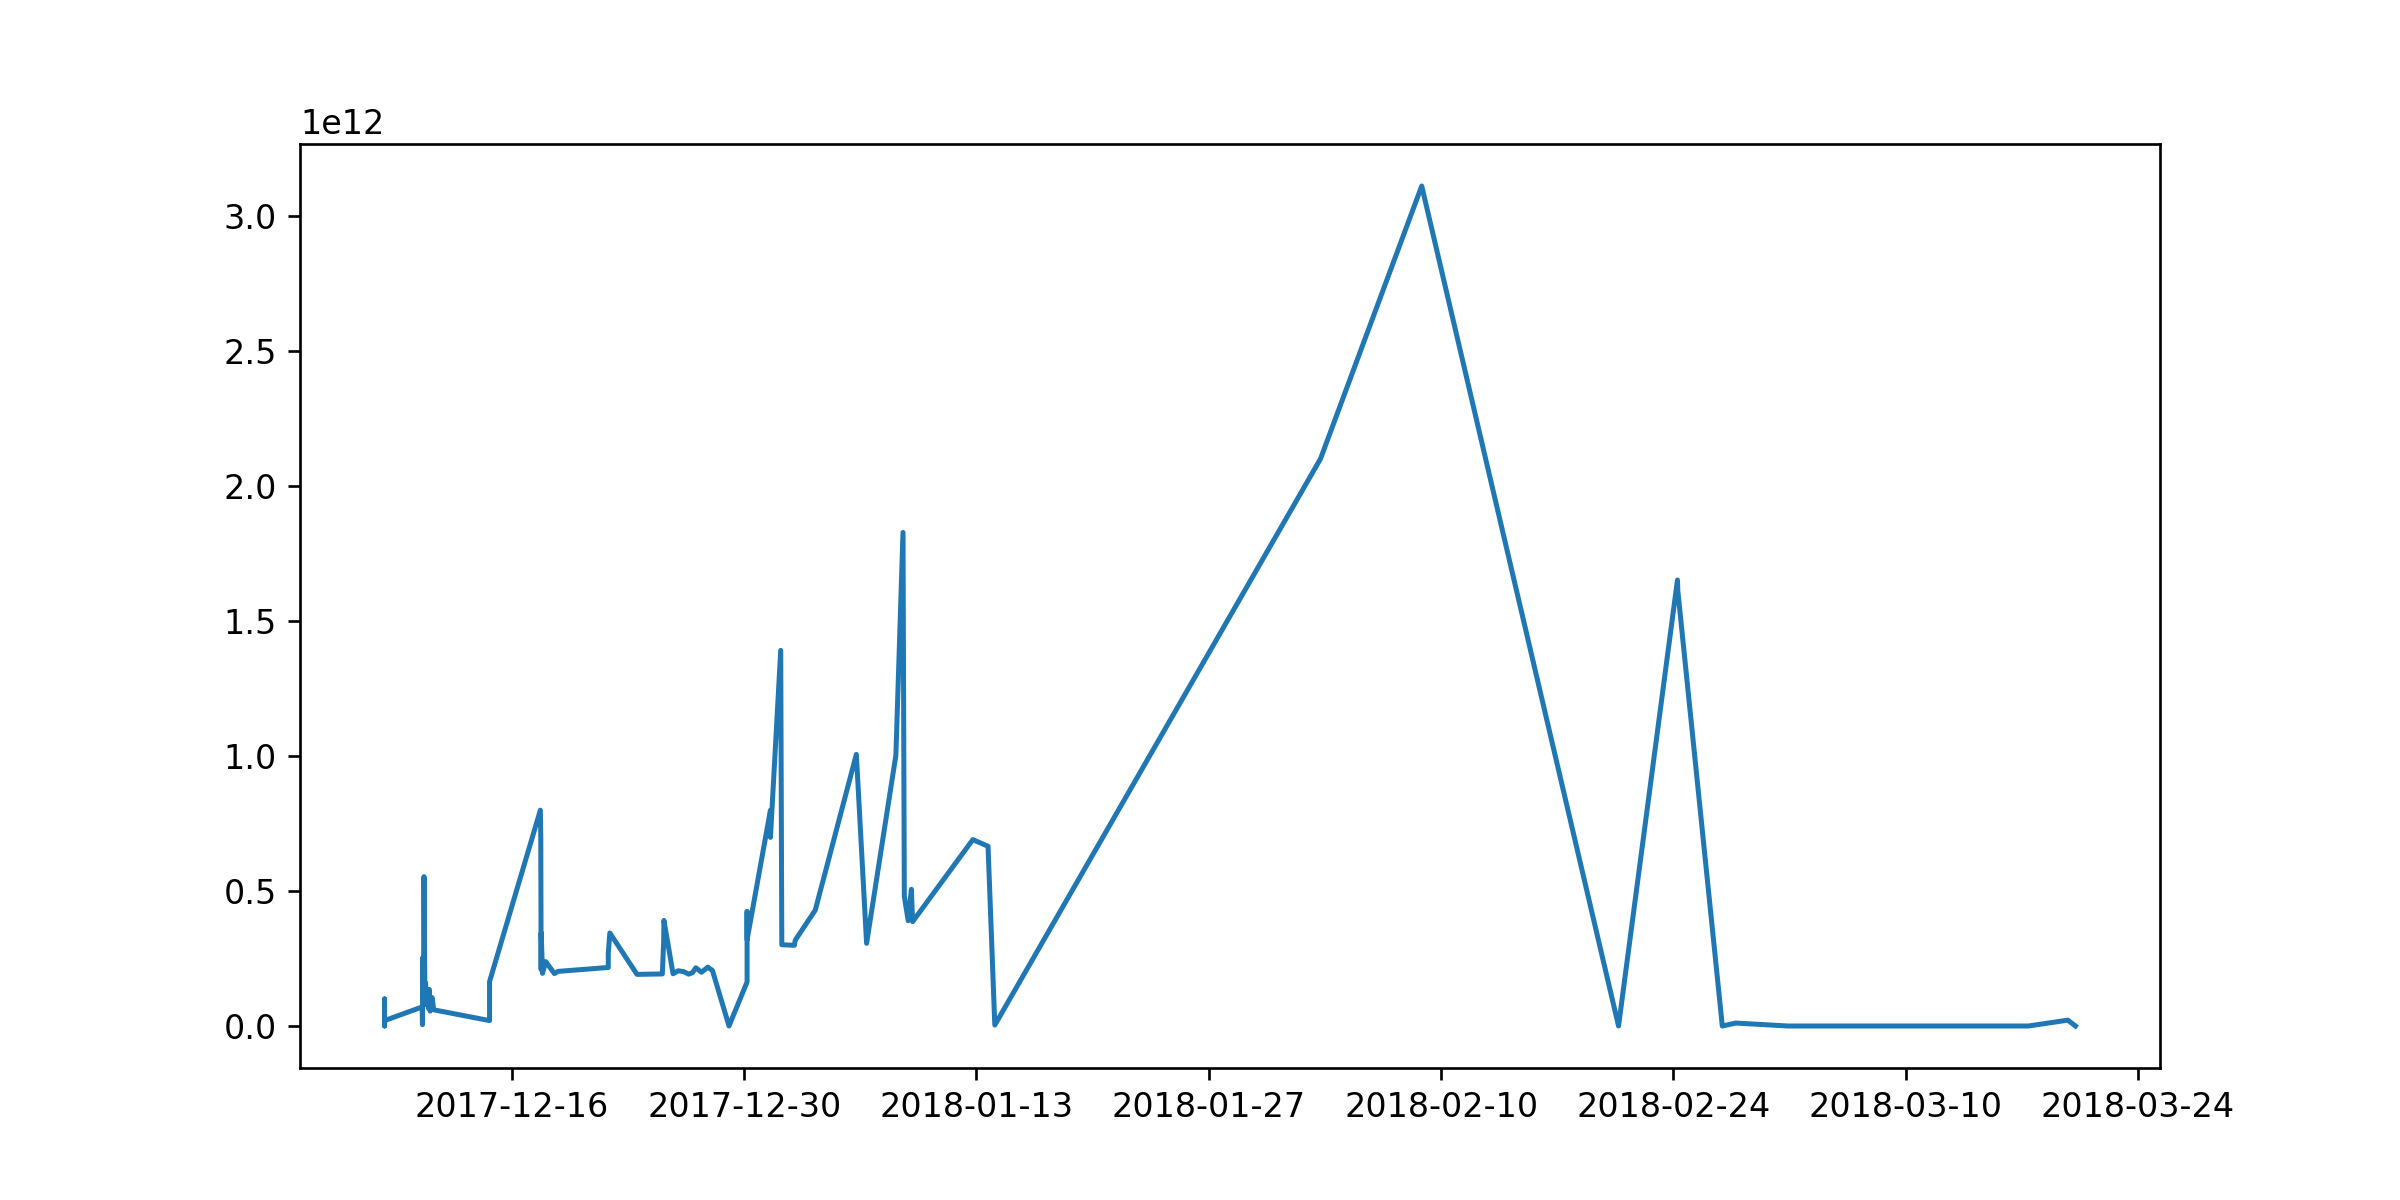

In [16]:
txs = [(tx.block.height, tx.output_count,tx.output_value,tx.input_value) for tx in binance_txes]
binance_df = pd.DataFrame(txs, columns=["Height", "outputs_count", "outputs_value", 'inputs_value'])
binance_df=binance_df.set_index('Height')
binance_df = chain.heights_to_dates(binance_df)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(binance_df['outputs_value'])


## Bittrex
16rCmCmbuWDhPjWTrpQGaU3EPdZF7MTdUk

In [27]:
rex_address = chain.address_from_string("16rCmCmbuWDhPjWTrpQGaU3EPdZF7MTdUk")
rex_address.balance()

15920304772534

In [28]:
rex_cluster = cm.cluster_with_address(rex_address)
rex_txes = rex_cluster.out_txes()
rex_cluster.balance()

16980294298711

<IPython.core.display.Javascript object>


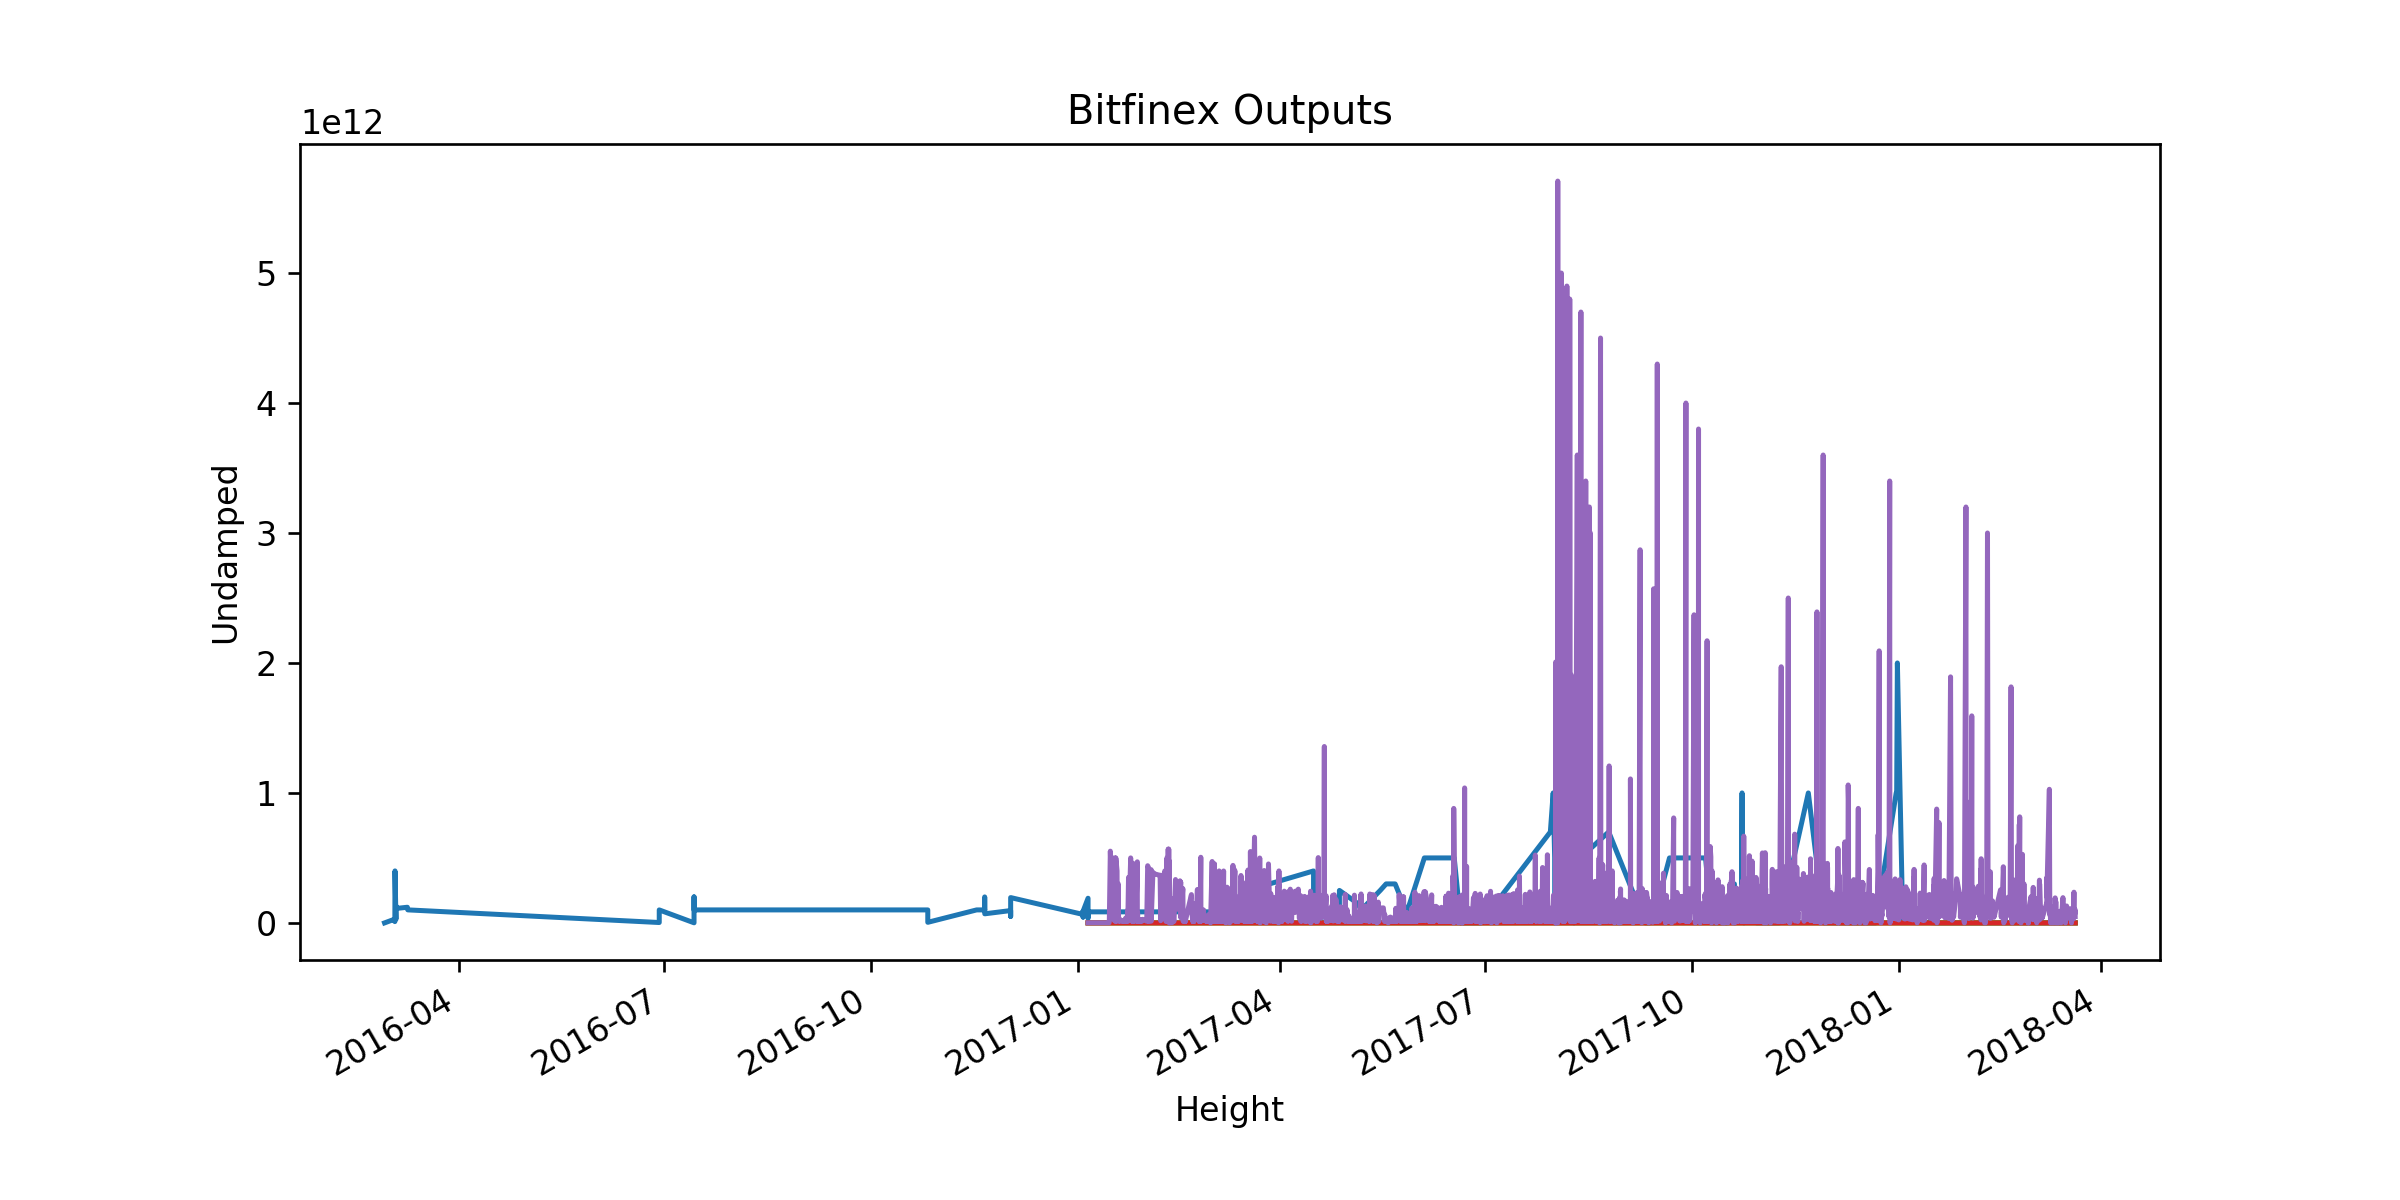

In [30]:
txs = [(tx.block.height, tx.output_count,tx.output_value,tx.input_value) for tx in rex_txes]
rex_df = pd.DataFrame(txs, columns=["Height", "outputs_count", "outputs_value", 'inputs_value'])
rex_df=rex_df.set_index('Height')
rex_df = chain.heights_to_dates(rex_df)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(rex_df['outputs_value'])

In [8]:
import blocksci
import pandas as pd
import numpy as np

chain = blocksci.Blockchain("/home/ubuntu/bitcoin")
block_day = 6 * 24
block_year = 365 * block_day
block_week = 7 * block_day
block_month = block_year // 12
block_3month = block_year // 4
block_6month = block_year // 2
cutoffs = [0, 
           block_day, 
           block_week, 
           block_month, 
           block_3month, 
           block_6month, 
           block_year, 
           block_year + block_6month, 
           block_year * 2,
           block_year * 3,
           block_year * 5,
           block_year * 20
]
buckets = list(zip(cutoffs[:-1], cutoffs[1:]))
bucket_names = [
    "<1d",
    "1d-1w",
    "1w-1m",
    "1-3m",
    "3-6m",
    "6-12m",
    "12-18m",
    "18-24m",
    "2-3y",
    "3-5y",
    ">5y"
]

def calculateImpl(blocks):
    totals = np.zeros((len(chain), len(buckets)))
    for block in blocks:
        never_spent = np.sum(block.outputs.unspent.value)
        spent_outputs = block.outputs.spending_tx.has_value
        output_heights = block.outputs.spending_tx.block_height.with_value
        output_ages = output_heights - block.height
        output_values = block.outputs.value[spent_outputs]
        age_sort = np.argsort(output_ages)
        sorted_ages = output_ages[age_sort]
        if len(output_values) > 0:
            sorted_values = output_values[age_sort]
            cuts = np.searchsorted(sorted_ages, cutoffs, side="left")
            out = np.add.reduceat(np.concatenate((sorted_values, np.zeros(1, dtype=int))), cuts)
            stop_points = np.empty_like(cuts)
            stop_points[:-1] = cuts[1:]
            stop_points[-1] = len(sorted_values)
            out[cuts == stop_points] = 0
            for i, cut in enumerate(zip(cuts[:-1], cuts[1:])):
                np.subtract.at(totals, (output_heights[age_sort][cut[0]:cut[1]], i), sorted_values[cut[0]:cut[1]])
        else:
            out = np.zeros(len(cutoffs))
        out[-1] = never_spent
        out = out[::-1].cumsum()[::-1]
        
        for i, (start, end) in enumerate(buckets):
            if block.height + start < len(chain):
                totals[block.height + start, i] += out[i]
                if i > 0:
                    totals[block.height + start, i - 1] -= out[i]
    return totals
def calculateNet(blocks):
    return calculateImpl(blocks).cumsum(axis=0)
def calculateNetMulti(chain):
    def mapFunc(blocks):
        return [calculateImpl(blocks)]

    def reduceFunc(accum, new_val):
        accum.extend(new_val)
        return accum
    parts = chain.mapreduce_block_ranges(mapFunc, reduceFunc)
    return sum(parts).cumsum(axis=0)
  
data = calculateNetMulti(chain.range(start = "2017-1-1", end = "2017-12-30"))
df = pd.DataFrame(data, index=chain.blocks.time)
total = df.sum(axis=1)
for i in range(11):
    df[i] /= total
df.columns = bucket_names
df.plot.area()

AttributeError: 'blocksci.BlockRange' object has no attribute 'mapreduce_block_ranges'

In [2]:
chain = blocksci.Blockchain("/home/ubuntu/bitcoin")

NameError: name 'blocksci' is not defined

In [5]:
chain2 =chain.range(start = "2018-9-1", end = "2018-9-10")

In [55]:
for block in range(len(chain2)-1,len(chain2)):
    for tx in chain2[block].txes:
            for output in filter(None,tx.outputs.spending_tx):
                print(output.output_value)
                
        
        
        
        

325495171
378190238
373838172
116128293
101050918
100044242
4901327695
2043105247
3833594040
11063172242
351177
11406479
2285431379
106140700
90808164
2730
52933491
1987198
100044242
1296225
34068635
2974253
3163700319
32657347
143378687818
5715897
546690361
63169968
615858190
157884218
847948471
7050846
3304852
2383433440
581108266
2578875164
64419576
8960525
6884780
500991784
6211982
470168053
484228865
504946360
973566200
3251903631
396824
1199496976
11213432183
1199496976
282919948
500991784
4446121012
32148113
1882469
504946360
5890797
8213090
1554564
4911648
30608680
4051123804
3696665
217004107
63406906
43516619
14474060509
59167638
34068635
17200651
80031983
4163240
2087910
3541722
1996367
2533047
500906587
34068635
40532067
5949940805
1389977
269209
113206881
2000725873
66279214
5715897
11574675
12715133
23758195
4900787743
1906942
23021430
199970200
2149526395
28383799
49884178
2391334
27157996
8517440
201083400
202566000
200721673
200753273
90264813
11575503
3929542
12051634

In [84]:
for block in range(len(chain2)-1,len(chain2)):
    for output in chain2[block].txes.outputs:
            if(output.is_spent):
                value_btc = output.value/10e8
                if(value_btc > 20):
                    print(value_btc)

23.568377554
36.0
59.930345737
34.973398052


In [107]:
for block in range(len(chain2)-1,len(chain2)):
    #finds the value of outputs spent in a transaction (ie not the UTXOs)
    t = [output.value/10e8 for output in chain2[block].txes.outputs if output.is_spent and output.value/10e8 > 20 ]
    a = [output.address for output in chain2[block].txes.outputs if output.is_spent and output.value/10e8 > 20 ]

               

In [108]:
a

[ScriptHashAddress(3DzSVk4veMCkNbNT9CdETeE26uWxmNbBnD),
 ScriptHashAddress(3FxUA8godrRmxgUaPv71b3XCUxcoCLtUx2),
 WitnessPubkeyAddress(bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3dn),
 ScriptHashAddress(3PyzoST1Dh8TWeA7yYNdPtXNygaFvAdJ1w)]

In [109]:
s

[23.568377554, 36.0, 59.930345737, 34.973398052]